In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, 
    MaxPool2D,
    Flatten,
    Dense
)

sns.set()
print(tf.__version__)

2.4.1


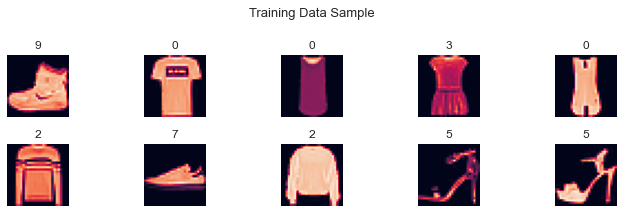

In [2]:
# Load and normalize data
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
# Plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3))
axes = np.ravel(axes)
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].set(title=f'{y_train[i]}')
    axes[i].axis('off')
fig.suptitle('Training Data Sample', size=13)
plt.tight_layout()
plt.show()

In [3]:
def load_and_normalize_data():
    """Load and normalize the Fashion MNIST dataset included with Keras
    """
    mnist = tf.keras.datasets.fashion_mnist

    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, y_train), (X_test, y_test)


def compile_and_fit(model, callbacks_list):
    cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    history = cnn.fit(
        X_train, 
        y_train, 
        epochs=5, 
        validation_data=(X_test, y_test),
        callbacks=callbacks_list
    )
    return history

# Without Convolutions

In [4]:
# Load and normalize data
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build model
cnn = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Define custom callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.99:
            print('Reached over 99% val accuracy, so stopping training!')
            self.model.stop_training = True

# Fit model with callbacks
custom_callback = myCallback()
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3
)
callbacks = [custom_callback, early_stopping]
history = cnn.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_test, y_test),
    callbacks=callbacks
)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6351 - accuracy: 0.7737 - val_loss: 0.4535 - val_accuracy: 0.8404
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3860 - accuracy: 0.8635 - val_loss: 0.3889 - val_accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.3390 - accuracy: 0.8770 - val_loss: 0.3573 - val_accuracy: 0.8705
Epoch 4/10
1875/1875 [==============================] - 2s 958us/step - loss: 0.3135 - accuracy: 0.8852 - val_loss: 0.3580 - val_accuracy: 0.8691
Epoch 5/10
1875/1875 [==============================] - 2s 996us/step - loss: 0.2958 - accuracy: 0.8902 - val_loss: 0.3901 - val_accuracy: 0.8595
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2817 - accuracy: 0.8969 - val_loss: 0.3384 - val_accuracy: 0.8789
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2682 - accuracy: 0.9013 - val_loss: 0.3765 - val_acc

In [5]:
cnn.evaluate(X_test, y_test)

classifications = cnn.predict(X_test)
first_pred = classifications[0].argmax()
print(f'The first test set prediction is {first_pred}')

313/313 [==============================] - 0s 637us/step - loss: 0.3425 - accuracy: 0.8807
The first test set prediction is 9


### Without Convolutions Results
* **Train set accuracy: 91.01%**
* **Test set accuracy: 87.23%**

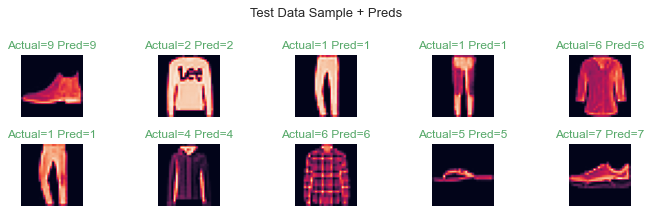

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3))
axes = np.ravel(axes)
for i in range(10):
    axes[i].imshow(X_test[i])
    actual = y_test[i]
    pred = classifications[i].argmax()
    if actual == pred:
        color = 'g'
    else:
        color = 'r'
    axes[i].set_title(f'Actual={actual} Pred={pred}', c=color)
    axes[i].axis('off')
fig.suptitle('Test Data Sample + Preds', size=13)
plt.tight_layout()
plt.show()

# With Convolutions

In [7]:
# Load and normalize data
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add channel dimension for Conv layers (just 1 since images are B&W)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Build model
cnn = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Define custom callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.99:
            print('Reached over 99% val accuracy, so stopping training!')
            self.model.stop_training = True

# Fit model with callbacks
custom_callback = myCallback()
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3
)
callbacks = [custom_callback, early_stopping]
history = cnn.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_test, y_test),
    callbacks=callbacks
)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.6057 - accuracy: 0.7793 - val_loss: 0.3537 - val_accuracy: 0.8721
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3030 - accuracy: 0.8876 - val_loss: 0.3113 - val_accuracy: 0.8840
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2467 - accuracy: 0.9084 - val_loss: 0.2585 - val_accuracy: 0.9047
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2134 - accuracy: 0.9196 - val_loss: 0.2684 - val_accuracy: 0.8992
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1847 - accuracy: 0.9306 - val_loss: 0.2714 - val_accuracy: 0.9054
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1574 - accuracy: 0.9410 - val_loss: 0.2972 - val_accuracy: 0.9021
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1336 - accuracy: 0.9497 - val_loss: 0.2759 -

In [8]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3284 - accuracy: 0.9097


[0.32836177945137024, 0.9096999764442444]

Takes WAY longer to train with convolutions (18x longer in fact) but we have gained in performance. 

### With Convolutions Results
* **Train set accuracy: 96.55%** (6.1% increase)
* **Test set accuracy: 91.41%** (4.8% increase)

In [9]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### Explaining `model.summary()`

* Thanks to the convolutions, we lose a pixel at the top/bottom and left/right of each image thus our (28, 28) images become (26, 26). We have chosen 64 units in our `Conv2D` layers and so the final axis dimension is 64. First dimension is reserved for batch size.
* With `MaxPool2D`, we turn each 2x2 grid into 1 pixel; 2 pixels on the x-axis become 1 and 2 pixels on the y-axis become one. So, this halves the total number of pixels in each image. We go from (26, 26) images to (13, 13). 
* The same process happens again with the `Conv2D` layers removing 2 pixels from each axis and the `MaxPool2D` layer halving the size. 
* Without convolutions we were giving the network 28x28 = 784 pixels to use to classify each image Now we are giving it 5x5x64 = 1600 pixles! We have more than doubled the amount of information even though we have decreased the images to just 5x5. The increase comes from the fact we have split each image up into 64 separate ones.

## Visualzing Convolutions

In [10]:
for i, label in enumerate(y_test[:100]):
    if label == 5:
        print(f'Index {i}: {label}')

Index 8: 5
Index 11: 5
Index 21: 5
Index 37: 5
Index 52: 5
Index 63: 5
Index 82: 5
Index 84: 5
Index 90: 5


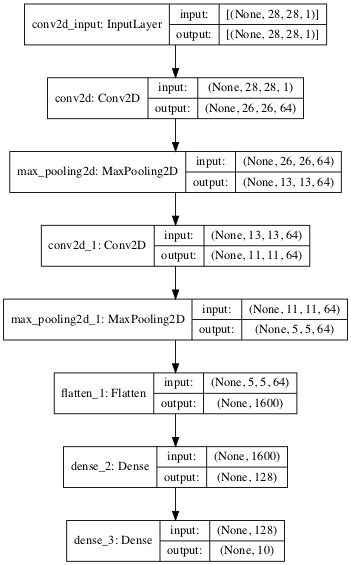

In [11]:
# Create model with multiple outputs
# Each output is a layer of our trained model and we are going to inspect the convolutions
# and how they evolve as the input image moves through them.
layer_outputs = [layer.output for layer in cnn.layers]
activation_model = tf.keras.models.Model(inputs=cnn.input, outputs=layer_outputs)

tf.keras.utils.plot_model(activation_model, show_shapes=True, dpi=64)

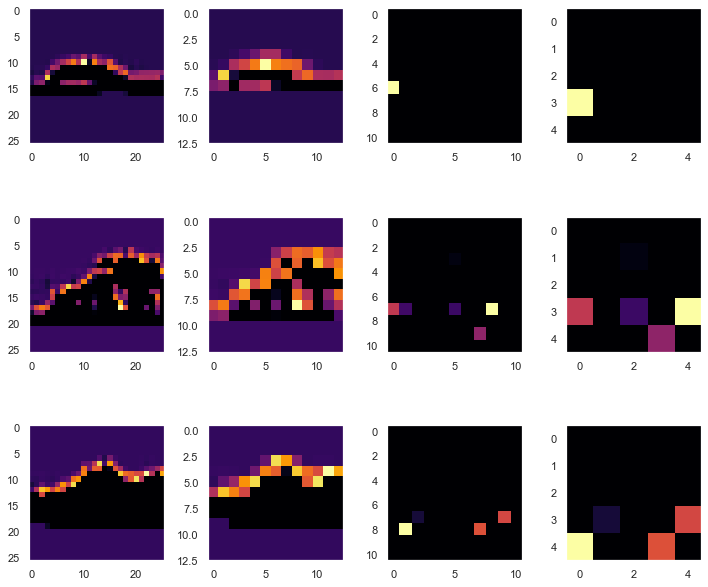

In [12]:
def get_xth_layer_conv_output(image_idx, convolution_num):
    image = X_test[image_idx].reshape(1, 28, 28, 1)
    all_layer_outputs = activation_model.predict(image)
    xth_layer_output = all_layer_outputs[x]
    # Get output just for this convolution/feature map/filter
    # We select 0 in first dim but could have used : since there is only ever one here
    xth_layer_conv_output = xth_layer_output[0, :, :, convolution_num]
    return xth_layer_conv_output


nrows = 3
# 4 columns becuase we have 4 layers before Flatten and want to see how image
# changes as it moves through each
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 9))

FIRST_IMAGE=8
SECOND_IMAGE=11
THIRD_IMAGE=21
CONVOLUTION_NUMBER = 1 # How many are there?

for x in range(ncols):
    conv_output_1 = get_xth_layer_conv_output(FIRST_IMAGE, CONVOLUTION_NUMBER)
    axes[0,x].imshow(conv_output_1, cmap='inferno')
    axes[0,x].grid(False)

    conv_output_2 = get_xth_layer_conv_output(SECOND_IMAGE, CONVOLUTION_NUMBER)
    axes[1,x].imshow(conv_output_2, cmap='inferno')
    axes[1,x].grid(False)

    conv_output_3 = get_xth_layer_conv_output(THIRD_IMAGE, CONVOLUTION_NUMBER)
    axes[2,x].imshow(conv_output_3, cmap='inferno')
    axes[2,x].grid(False)

# ADD TITLES SAYING WHICH LAYER WE ARE LOOKING AT 
# AND HOW BIG EACH IMAGE IS
# AND THE INDEX OF THE ORIGINAL IMAGES - ALSO ACTUALLY COOL TO INCLUDE THE ORIGINAL IMAGE AS WELL
# INCREASE FIGSIZE
plt.tight_layout()
plt.show()

In [13]:
y_test[0]

9

In [14]:
layer_preds = activation_model.predict(X_test[0].reshape(1, 28, 28, 1))
for pred in layer_preds:
    print(pred.shape)

(1, 26, 26, 64)
(1, 13, 13, 64)
(1, 11, 11, 64)
(1, 5, 5, 64)
(1, 1600)
(1, 128)
(1, 10)


In [15]:
layer_preds[0][0, :, :, 1].shape

(26, 26)